In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import torch
import torch.autograd as ag
from tqdm import tqdm

In [3]:
np.random.seed(0)

In [4]:
dataset = np.random.normal(size=[1000, 10])
bias = np.random.normal(size=10)

y = dataset + bias
X = dataset

In [7]:
# Notice that requires_grad is set to true for the bias vec.
# If you like, you can add it to X_t as well, but because you never _use_ that 
# graident (it's not passed into Adam below), it's wasted work, and you'll need
# to zero its gradient separately, because it won't be convered by the 
# optimizer's zero_grad call.
# 
# You cannot set it on y_t, the loss function (MSELoss) will complain because 
# it won't let you gradient-descend it's target.
bias_vec_t = ag.Variable(torch.from_numpy(np.random.normal(size=10)), requires_grad=True)
X_t = ag.Variable(torch.from_numpy(X))
y_t = ag.Variable(torch.from_numpy(y))

In [8]:
# Put in bias_vec_t here, because it's the only thing we
# want to optimize
opt = torch.optim.Adam(params=[bias_vec_t])

In [9]:
t = tqdm(range(2500))
losses = []
for _ in t:
    # I forgot to zero the graident once. It was bad.
    # Everything broke. Remeber to do this step.
    opt.zero_grad()
    loss = torch.nn.MSELoss()(X_t + bias_vec_t.expand(X_t.size()), y_t)
    loss.backward()
    opt.step()
    l = loss.data.numpy()[0]
    t.set_description(str(l))
    losses.append(l)

0.0543171489942: 100%|██████████| 2500/2500 [00:00<00:00, 3599.45it/s]


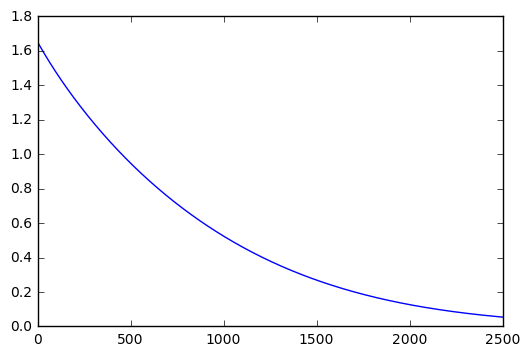

In [10]:
plot(losses)

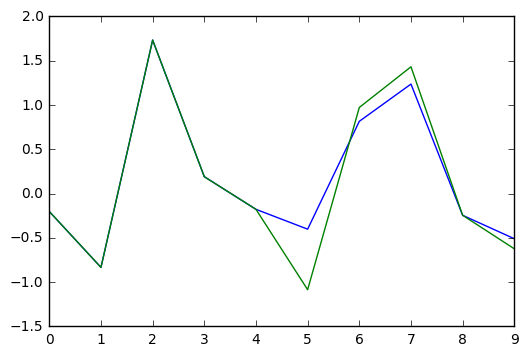

In [11]:
plot(bias_vec_t.data.numpy())
plot(bias)